In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
%config IPCompleter.greedy=True

## Reading data from file

In [314]:
from collections import Counter

data1 = pd.read_csv("20151219.txt", sep = "\t", header = None)
data1.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

data2 = pd.read_csv("20151220.txt", sep = "\t", header = None)
data2.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

data = data1.append(data2, ignore_index=True)

print(Counter(data["attack_flag"]))

Counter({-1: 338997, 1: 80149})


## Transform to binary

In [315]:
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-2, -1)
data.loc[:, "attack_flag"] = data.loc[:, "attack_flag"] * -1
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(data["attack_flag"]))

Counter({1: 338997, 0: 80149})


## Drop additional features

In [316]:
# slice dataset, drop additional features
print(data.shape)
data = data.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(data.shape)

# drop software markers
data = data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
data["attack_flag"].value_counts()

(419146, 24)
(419146, 21)


1    338997
0     80149
Name: attack_flag, dtype: int64

In [317]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419146 entries, 0 to 419145
Data columns (total 18 columns):
conn len                       419146 non-null float64
service                        419146 non-null object
src bytes                      419146 non-null int64
dst bytes                      419146 non-null int64
conn numb                      419146 non-null int64
Same srv rate                  419146 non-null float64
Serror rate                    419146 non-null float64
Srv serror rate                419146 non-null float64
Dst host count                 419146 non-null int64
Dst host srv count             419146 non-null int64
Dst host same src port rate    419146 non-null float64
Dst host serror rate           419146 non-null float64
Dst host srv serror rate       419146 non-null float64
Conn state                     419146 non-null object
attack_flag                    419146 non-null int64
src port                       419146 non-null int64
dst port                 

In [318]:
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag,src port,dst port,proto
419136,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,0.0,0.0,0.0,S0,1,54695,8081,tcp
419137,0.000000,other,0,0,0,0.0,0.0,0.00,1,1,0.0,1.0,1.0,S0,1,44997,21320,tcp
419138,0.485847,other,0,0,0,0.0,0.0,1.00,5,4,0.0,0.0,0.0,RSTR,1,65024,3389,tcp
419139,3.253905,other,0,0,0,0.0,0.0,0.50,1,39,1.0,1.0,1.0,S0,1,18399,25,tcp
419140,0.000000,other,0,0,0,0.0,0.0,0.67,4,4,1.0,1.0,1.0,S0,1,33863,20012,tcp
419141,0.000000,other,0,0,0,0.0,0.0,0.75,0,0,0.0,0.0,0.0,OTH,1,3,3,icmp
419142,3.135446,rdp,1726,5591,1,0.0,0.0,0.00,5,72,0.0,0.0,0.0,S1,1,62518,3389,tcp
419143,0.000000,other,0,0,0,0.0,0.0,0.60,0,2,0.0,0.0,1.0,S0,1,35137,123,udp
419144,0.000000,other,0,0,0,0.0,0.0,0.67,0,0,0.0,0.0,0.0,S0,1,42613,81,tcp
419145,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,0.0,0.0,0.0,S0,1,42346,21320,tcp


In [319]:
data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag,src port,dst port
count,419146.000000,4.191460e+05,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000
mean,0.897800,2.168004e+04,364.750896,2.522923,0.357259,0.064550,0.548421,25.437657,28.919419,0.073814,0.068824,0.153320,0.808780,34004.366686,3584.727816
std,4.749450,4.708272e+06,2285.497265,5.451557,0.477454,0.244823,0.462899,41.519257,42.252740,0.259441,0.252677,0.357215,0.393262,19713.691673,10928.964687
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12375.000000,23.000000
50%,0.000091,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,38884.000000,53.000000
75%,0.721284,4.500000e+01,77.000000,3.000000,1.000000,0.000000,1.000000,73.000000,92.000000,0.000000,0.000000,0.000000,1.000000,50359.000000,1433.000000
max,1061.910079,1.696585e+09,157723.000000,84.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,65507.000000


In [320]:
# removing NaNs
data = data.dropna()
data.shape

(419146, 18)

In [321]:
data["Conn state"].value_counts(dropna=False)

S0        247950
SF        104018
RSTO       26466
OTH        19608
REJ        15659
RSTRH       1853
RSTOS0      1514
SHR         1195
RSTR         778
S1           103
SH             2
Name: Conn state, dtype: int64

In [322]:
data["service"].value_counts(dropna=False)

other      259775
dns        102883
ssh         29769
sip         20915
rdp          3640
snmp         1096
smtp          999
dhcp           43
http           21
ssl             3
dns,sip         2
Name: service, dtype: int64

In [323]:
data["proto"].value_counts(dropna=False)

tcp     256581
udp     153868
icmp      8697
Name: proto, dtype: int64

# a bit of feature engineering

## port numbers classification

In [324]:
t1 = 1023  # well-known port numbers
t2 = 49151 # registered ports
t3 = 65535 # client ports

def wk(data_row):
    if (data_row["src port"] <= t1): 
        value = 1
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def reg(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 1
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def cli(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 1
    return value

data["well-known src pool"] = data.apply(wk, axis=1)
data["registered src pool"] = data.apply(reg, axis=1)
data["cli src pool"] = data.apply(cli, axis=1)

In [325]:
print(Counter(data["well-known src pool"]))
print(Counter(data["registered src pool"]))
print(Counter(data["cli src pool"]))

Counter({0: 406741, 1: 12405})
Counter({1: 291278, 0: 127868})
Counter({0: 303683, 1: 115463})


In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419146 entries, 0 to 419145
Data columns (total 21 columns):
conn len                       419146 non-null float64
service                        419146 non-null object
src bytes                      419146 non-null int64
dst bytes                      419146 non-null int64
conn numb                      419146 non-null int64
Same srv rate                  419146 non-null float64
Serror rate                    419146 non-null float64
Srv serror rate                419146 non-null float64
Dst host count                 419146 non-null int64
Dst host srv count             419146 non-null int64
Dst host same src port rate    419146 non-null float64
Dst host serror rate           419146 non-null float64
Dst host srv serror rate       419146 non-null float64
Conn state                     419146 non-null object
attack_flag                    419146 non-null int64
src port                       419146 non-null int64
dst port                 

In [327]:
# data.loc[:, ["src port", "dst port", "well-known src pool", "registered src pool", "cli src pool", "well-known dst pool", "registered dst pool", "cli dst pool"]].head(30)
data.loc[:, ["src port", "dst port", "well-known src pool", "registered src pool", "cli src pool"]].head(30)

,src port,dst port,well-known src pool,registered src pool,cli src pool
0,40061,111,0,1,0
1,53488,80,0,0,1
2,35051,23,0,1,0
3,1408,445,0,1,0
4,55244,995,0,0,1
5,44544,995,0,1,0
6,50678,5900,0,0,1
7,35051,23,0,1,0
8,50678,5900,0,0,1
9,50678,5900,0,0,1


## Change port number info to categorical

In [328]:
data["src port"] = data["src port"].apply(str)
data["dst port"] = data["dst port"].apply(str)
print(data['src port'].nunique())
print(data['dst port'].nunique())

thresh1 = 230
thresh2 = 230
counts1 = data['src port'].value_counts()
counts2 = data['dst port'].value_counts()

repl1 = counts1[counts1 <= thresh1].index
repl2 = counts2[counts2 <= thresh2].index

#hot one encoding for src port numbers
data = pd.concat([data, pd.get_dummies(data["src port"].replace(repl1, 'other_src'), prefix="is_src")], axis=1)

#hot one encoding for dst port numbers
data = pd.concat([data, pd.get_dummies(data["dst port"].replace(repl2, 'other_dst'), prefix="is_dst")], axis=1)

56410
4462


In [ ]:
data.shape

## Hot one encoding

In [330]:
### hot one encoding ###

# hot one encoding for service
data = pd.concat([data, pd.get_dummies(data["service"], prefix="is")], axis=1)
data.tail(10)

#hot one encoding for proto - commented due to reduced column number
data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
data.tail(10)

# hot one encoding for conn state
data = pd.concat([data, pd.get_dummies(data["Conn state"], prefix="state")], axis=1)
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SH,state_SHR
419136,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,...,0,0,0,0,0,1,0,0,0,0
419137,0.000000,other,0,0,0,0.0,0.0,0.00,1,1,...,0,0,0,0,0,1,0,0,0,0
419138,0.485847,other,0,0,0,0.0,0.0,1.00,5,4,...,0,0,0,1,0,0,0,0,0,0
419139,3.253905,other,0,0,0,0.0,0.0,0.50,1,39,...,0,0,0,0,0,1,0,0,0,0
419140,0.000000,other,0,0,0,0.0,0.0,0.67,4,4,...,0,0,0,0,0,1,0,0,0,0
419141,0.000000,other,0,0,0,0.0,0.0,0.75,0,0,...,0,0,0,0,0,0,0,0,0,0
419142,3.135446,rdp,1726,5591,1,0.0,0.0,0.00,5,72,...,0,0,0,0,0,0,1,0,0,0
419143,0.000000,other,0,0,0,0.0,0.0,0.60,0,2,...,0,0,0,0,0,1,0,0,0,0
419144,0.000000,other,0,0,0,0.0,0.0,0.67,0,0,...,0,0,0,0,0,1,0,0,0,0
419145,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,...,0,0,0,0,0,1,0,0,0,0


In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419146 entries, 0 to 419145
Columns: 292 entries, conn len to state_SHR
dtypes: float64(7), int64(9), object(5), uint8(271)
memory usage: 178.7+ MB


## Plot function definition

In [332]:
# plotting method definition

def plot_stats(stat, name, width, rot):
    fig, ax = plt.subplots(figsize=(width, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=rot)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

## Dataset split

In [333]:
data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool",
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                     "Conn state" : "Conn_state" 
                    }, inplace=True)

In [581]:
train, validate, test = np.split(data, [int(.7*len(data)), int(.85*len(data))])

train_ex = train
validate_ex = validate
test_ex = test

train = train.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
validate = validate.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
test = test.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)

train = train.sample(frac=1)
validate = validate.sample(frac=1)
test = test.sample(frac=1)

y_train = train.loc[:, "attack_flag"].values.ravel()
X_train = train.drop(["attack_flag"], axis=1).astype(np.float32)
y_validate = validate.loc[:, "attack_flag"].values.ravel()
X_validate = validate.drop(["attack_flag"], axis=1).astype(np.float32)
y_test = test.loc[:, "attack_flag"].values.ravel()
X_test = test.drop(["attack_flag"], axis=1).astype(np.float32)

print(Counter(y_test))
print(Counter(y_validate))
print(Counter(y_train))

Counter({1: 54763, 0: 8109})
Counter({1: 59796, 0: 3076})
Counter({1: 224438, 0: 68964})


# Algoritms performance comparison

In [23]:
from collections import Counter

print(Counter(y_test))

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

Counter({1: 54763, 0: 8109})


In [24]:
# Metrics of baseline method
from sklearn import metrics

name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred = np.ones(len(y_test)).ravel() 
else:
    y_pred = np.zeros(len(y_test)).ravel() 
    
Acc[name] = metrics.accuracy_score(y_test, y_pred)
F1S[name] = metrics.f1_score(y_test, y_pred)
Prec[name] = metrics.precision_score(y_test, y_pred)
Rec[name] = metrics.recall_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: baseline     Accuracy: 0.87102, F1-score: 0.93107, Precision: 0.87102, Recall: 1.00000, FPR: 1.00000
TN:   0; FP: 8109; FN:    0; TP: 54763



In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_test)

name = "logistic Regression"

Acc[name] = metrics.accuracy_score(y_test, y_pred)
F1S[name] = metrics.f1_score(y_test, y_pred)
Prec[name] = metrics.precision_score(y_test, y_pred)
Rec[name] = metrics.recall_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: logistic Regression Accuracy: 0.92776, F1-score: 0.95724, Precision: 0.98793, Recall: 0.92840, FPR: 0.07658
TN: 7488; FP: 621; FN: 3921; TP: 50842



In [26]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = 0)
# # learning rate [1 - default] najlepsze wyniki
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


seed = 12
num_trees = 40

classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees, random_state = 0),
               "DecisionTree":DecisionTreeClassifier(random_state=0, max_depth = 13),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=167, max_depth=38, random_state=0)),
}


for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: AdaBoost     Accuracy: 0.97900, F1-score: 0.98800, Precision: 0.98411, Recall: 0.99191, FPR: 0.10815
TN: 7232; FP: 877; FN:  443; TP: 54320

Algorithm: DecisionTree Accuracy: 0.97463, F1-score: 0.98555, Precision: 0.97777, Recall: 0.99346, FPR: 0.15255
TN: 6872; FP: 1237; FN:  358; TP: 54405

Algorithm: NaiveBayes   Accuracy: 0.86727, F1-score: 0.91772, Precision: 0.99739, Recall: 0.84984, FPR: 0.01505
TN: 7987; FP: 122; FN: 8223; TP: 46540

Algorithm: RandomTree   Accuracy: 0.97749, F1-score: 0.98714, Precision: 0.98270, Recall: 0.99162, FPR: 0.11789
TN: 7153; FP: 956; FN:  459; TP: 54304



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: RandomForest Accuracy: 0.98021, F1-score: 0.98874, Precision: 0.98059, Recall: 0.99702, FPR: 0.13331
TN: 7028; FP: 1081; FN:  163; TP: 54600



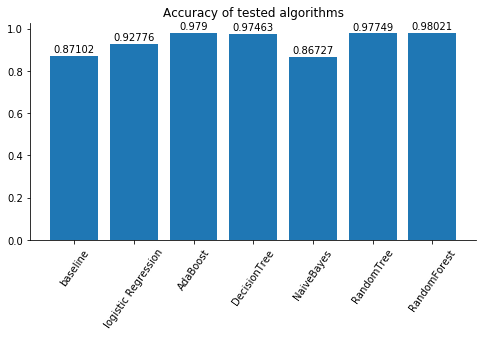

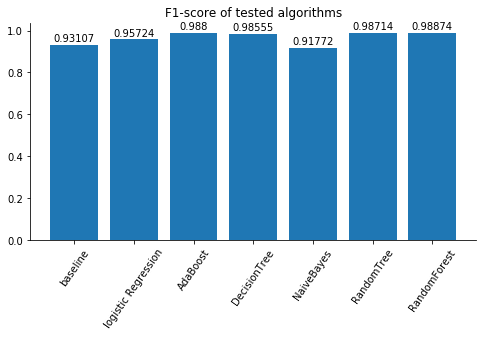

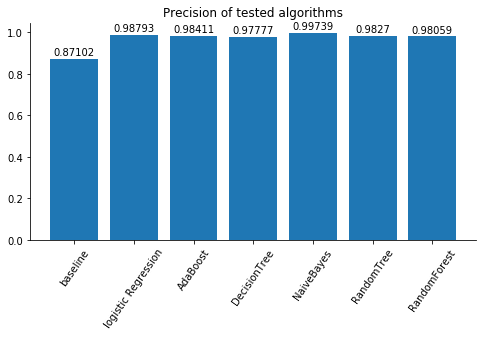

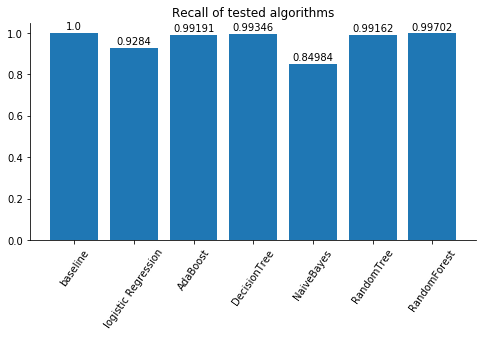

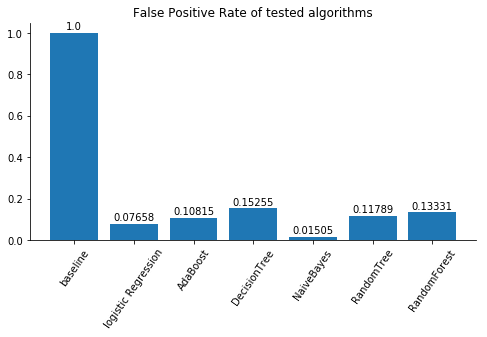

In [27]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)

# Random Features for Large-Scale Kernel Machines

In [593]:
import numpy as np
import tensorflow as tf
import time

In [594]:
X_train.values.shape

(293402, 286)

In [595]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(    
    x={"features": X_train.values},    
    y=y_train,    
    batch_size=180,    
    num_epochs=None,    
    shuffle=False)

In [596]:
X_validate.shape

(62872, 286)

In [597]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_validate.values},
    y=y_validate,
    batch_size=X_validate.shape[0],
    num_epochs=1,
    shuffle=False)

In [598]:
X_test.shape

(62872, 286)

In [599]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_test.values},
    y=y_test,
    batch_size=X_test.shape[0],
    num_epochs=1,
    shuffle=False)

## Using explicit kernel mappings with the linear model

In [600]:
data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool", 
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                    "Conn state" : "Conn_state" 
                    }, inplace=True)

In [601]:
feat_column = tf.contrib.layers.real_valued_column('features', dimension=len(X_train.columns.values))

In [602]:
kernel_mapper = tf.contrib.kernel_methods.RandomFourierFeatureMapper(input_dim=len(X_train.columns.values), output_dim=3000, stddev=5, name='rffm')

In [603]:
kernel_mappers = {feat_column: [kernel_mapper]}

In [604]:
! rm -r kernel_train

In [605]:
optimizer = tf.train.FtrlOptimizer(learning_rate=30, l2_regularization_strength=0.01)

In [606]:
estimator_kernel = tf.contrib.kernel_methods.KernelLinearClassifier(
    n_classes=2,
    optimizer=optimizer,
    kernel_mappers=kernel_mappers, 
    model_dir="kernel_train")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0b92861f60>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'kernel_train'}


In [607]:
estimator_kernel.fit(input_fn=train_input_fn, steps=10000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into kernel_train/model.ckpt.
INFO:tensorflow:loss = 0.6931474, step = 1
INFO:tensorflow:global_step/sec: 117.99
INFO:tensorflow:loss = 0.07498501, step = 101 (0.846 sec)
INFO:tensorflow:global_step/sec: 163.06
INFO:tensorflow:loss = 0.043834057, step = 201 (0.613 sec)
INFO:tensorflow:global_step/sec: 170.043
INFO:tensorflow:loss = 0.07361633, step = 301 (0.588 sec)
INFO:tensorflow:global_step/sec: 167.377
INFO:tensorflow:loss = 0.039425515, step = 401 (0.598 sec)
INFO:tensorflow:global_step/sec: 114.075
INFO:tensorflow:loss = 0.06621093, step = 501 (0.877 sec)
INFO:tensorflow:global_step/sec: 164.555
INFO:tensorflow:loss = 0.06463543, step = 601 (0.607 sec)
INFO:tensorflow:global_step/sec: 172.039
INFO:tensorflow:loss = 0.050641526, step = 701 (0.581 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:loss = 0.0073607224, step = 7601 (0.631 sec)
INFO:tensorflow:global_step/sec: 159.619
INFO:tensorflow:loss = 0.011813828, step = 7701 (0.627 sec)
INFO:tensorflow:global_step/sec: 158.268
INFO:tensorflow:loss = 0.03877332, step = 7801 (0.632 sec)
INFO:tensorflow:global_step/sec: 162.879
INFO:tensorflow:loss = 0.009772851, step = 7901 (0.614 sec)
INFO:tensorflow:global_step/sec: 161.252
INFO:tensorflow:loss = 0.051316462, step = 8001 (0.621 sec)
INFO:tensorflow:global_step/sec: 158.739
INFO:tensorflow:loss = 0.0200385, step = 8101 (0.629 sec)
INFO:tensorflow:global_step/sec: 159.294
INFO:tensorflow:loss = 0.0062377797, step = 8201 (0.628 sec)
INFO:tensorflow:global_step/sec: 160.818
INFO:tensorflow:loss = 0.05605266, step = 8301 (0.622 sec)
INFO:tensorflow:global_step/sec: 160.313
INFO:tensorflow:loss = 0.0067392513, step = 8401 (0.623 sec)
INFO:tensorflow:global_step/sec: 158.741
INFO:tensorflow:loss = 0.020801803, step = 8501 (0.630 sec)
INFO:tensorflow:global_step/sec:

KernelLinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7f0b92861518>, 'feature_columns': {_RealValuedColumn(column_name='features_MAPPED', dimension=3000, default_value=None, dtype=tf.float32, normalizer=None)}, 'optimizer': <tensorflow.python.training.ftrl.FtrlOptimizer object at 0x7f0b92861b70>, 'kernel_mappers': {_RealValuedColumn(column_name='features', dimension=286, default_value=None, dtype=tf.float32, normalizer=None): [<tensorflow.contrib.kernel_methods.python.mappers.random_fourier_features.RandomFourierFeatureMapper object at 0x7f0b92861c18>]}})

In [608]:
eval_metrics = estimator_kernel.evaluate(input_fn=eval_input_fn, steps=1)

INFO:tensorflow:Starting evaluation at 2019-05-22-13:05:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-05-22-13:05:34
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.9449198, accuracy/baseline_label_mean = 0.9510752, accuracy/threshold_0.500000_mean = 0.9449198, auc = 0.86609143, auc_precision_recall = 0.9906777, global_step = 10000, labels/actual_label_mean = 0.9510752, labels/prediction_mean = 0.899043, loss = 0.17453441, precision/positive_threshold_0.500000_mean = 0.9713822, recall/positive_threshold_0.500000_mean = 0.97068363


In [609]:
for key,value in sorted(eval_metrics.items()):
  print('%s: %s' % (key, value))

accuracy: 0.9449198
accuracy/baseline_label_mean: 0.9510752
accuracy/threshold_0.500000_mean: 0.9449198
auc: 0.86609143
auc_precision_recall: 0.9906777
global_step: 10000
labels/actual_label_mean: 0.9510752
labels/prediction_mean: 0.899043
loss: 0.17453441
precision/positive_threshold_0.500000_mean: 0.9713822
recall/positive_threshold_0.500000_mean: 0.97068363


In [610]:
correctness = []
class_id = []
pred_iterator = None

In [611]:
pred_iterator = estimator_kernel.predict(input_fn = test_input_fn)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [612]:
for pred_dict in pred_iterator:
    class_id.append(pred_dict['classes'])
    #print(pred_dict)

In [613]:
name = "RFFM"

Acc[name] = metrics.accuracy_score(y_test, class_id)
F1S[name] = metrics.f1_score(y_test, class_id)
Prec[name] = metrics.precision_score(y_test, class_id)
Rec[name] = metrics.recall_score(y_test, class_id)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, class_id).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

RFFM Accuracy: 0.95974, F1-score: 0.97702, Precision: 0.97151, Recall: 0.98260, FPR: 0.19460
TN: 6531; FP: 1578; FN:  953; TP: 53810



# Neural network part

In [410]:
import collections
import io
import math
import tensorflow as tf
from IPython import display

In [411]:
deep_numeric_feat = ["Same_srv_rate", "Serror_rate", "Srv_serror_rate", "Dst_host_count", "Dst_host_srv_count", "Dst_host_same_src_port_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "well_known_src_pool", "registered_src_pool", "cli_src_pool"]
wide_numeric_feat = ["conn_len",  "src_bytes", "dst_bytes", "conn_numb"]
categorical_feat = ["service", "Conn_state", "src_port", "dst_port", "proto"]

In [412]:
deep_numeric_feat_tf = [tf.feature_column.numeric_column(k) for k in deep_numeric_feat]
wide_numeric_feat_tf = [tf.feature_column.numeric_column(k) for k in wide_numeric_feat]

In [413]:
src_port_mod = ["src_" + s for s in data["src_port"].unique().tolist()]
src_port = tf.feature_column.categorical_column_with_vocabulary_list(
    'src_port', src_port_mod)

dst_port_mod = ["dst_" + s for s in data["dst_port"].unique().tolist()]
dst_port = tf.feature_column.categorical_column_with_vocabulary_list(
    'dst_port', dst_port_mod)

service = tf.feature_column.categorical_column_with_vocabulary_list(
    'service', data["service"].unique().tolist())

Conn_state = tf.feature_column.categorical_column_with_vocabulary_list(
    'Conn_state', data["Conn_state"].unique().tolist())

proto = tf.feature_column.categorical_column_with_vocabulary_list(
    'proto', data["proto"].unique().tolist())

In [545]:
deep_columns = [
    tf.feature_column.indicator_column(service),
    tf.feature_column.indicator_column(Conn_state),
    tf.feature_column.indicator_column(proto),
    tf.feature_column.embedding_column(src_port, dimension=10),
    tf.feature_column.embedding_column(dst_port, dimension=6),
]

In [546]:
crossed_columns = [
      tf.feature_column.crossed_column(
          ['src_port', 'service'], hash_bucket_size=5000),
      tf.feature_column.crossed_column(
          ['dst_port', 'service'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['conn_len', 'src_bytes'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['conn_len', 'dst_bytes'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['dst_port', 'conn_numb'], hash_bucket_size=10000),  
      tf.feature_column.crossed_column(
          ['service', 'proto'], hash_bucket_size=1000),
    
  ]

In [547]:
! rm -r NN_model2

In [548]:
NN_model = tf.estimator.DNNLinearCombinedClassifier(
    model_dir = "/home/matz/Desktop/ml_ids/NN_model2",
    #linear_optimizer = tf.train.FtrlOptimizer(learning_rate=3, l2_regularization_strength=0.001),
    linear_feature_columns = deep_columns + deep_numeric_feat_tf + wide_numeric_feat_tf + crossed_columns,
    dnn_activation_fn=tf.nn.selu,
    dnn_feature_columns = deep_columns + deep_numeric_feat_tf + wide_numeric_feat_tf,
    dnn_hidden_units = [2048, 1024]
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/home/matz/Desktop/ml_ids/NN_model2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0b84b6ae80>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [549]:
feature_set= deep_numeric_feat + wide_numeric_feat + categorical_feat

In [550]:
def get_input_fn(data_set, num_epochs=None, n_batch = 256, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({k: data_set[k].values for k in feature_set}),
       y = pd.Series(data_set["attack_flag"].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

In [551]:
NN_model.train(input_fn=get_input_fn(train_ex, n_batch=180), steps=20000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /home/matz/Desktop/ml_ids/NN_model2/model.ckpt.
INFO:tensorflow:loss = 1538.3977, step = 1
INFO:tensorflow:global_step/sec: 31.8022
INFO:tensorflow:loss = 8.696945, step = 101 (3.145 sec)
INFO:tensorflow:global_step/sec: 40.7238
INFO:tensorflow:loss = 11.738354, step = 201 (2.456 sec)
INFO:tensorflow:global_step/sec: 40.5161
INFO:tensorflow:loss = 1.4695693, step = 301 (2.468 sec)
INFO:tensorflow:global_step/sec: 40.5869
INFO:tensorflow:loss = 3.0787687, step = 401 (2.464 sec)
INFO:tensorflow:global_step/sec: 40.4295
INFO:tensorflow:loss = 100.779396, step = 501 (2.473 sec)
INFO:tensorflow:global_step/sec: 40.7313
INFO:tensorflow:loss = 18.407864, step = 601 (2.455 sec)
INFO:tensorflow:global_step/sec: 40.44

INFO:tensorflow:loss = 1.6040784, step = 8001 (2.506 sec)
INFO:tensorflow:global_step/sec: 39.7581
INFO:tensorflow:loss = 9.901038, step = 8101 (2.515 sec)
INFO:tensorflow:global_step/sec: 38.1368
INFO:tensorflow:loss = 2.0962982, step = 8201 (2.622 sec)
INFO:tensorflow:global_step/sec: 39.6967
INFO:tensorflow:loss = 2.3190284, step = 8301 (2.519 sec)
INFO:tensorflow:global_step/sec: 39.7067
INFO:tensorflow:loss = 4.5916142, step = 8401 (2.519 sec)
INFO:tensorflow:global_step/sec: 40.072
INFO:tensorflow:loss = 15.943678, step = 8501 (2.496 sec)
INFO:tensorflow:global_step/sec: 38.3611
INFO:tensorflow:loss = 2.6076875, step = 8601 (2.607 sec)
INFO:tensorflow:global_step/sec: 35.3928
INFO:tensorflow:loss = 2.9747353, step = 8701 (2.826 sec)
INFO:tensorflow:global_step/sec: 35.698
INFO:tensorflow:loss = 6.687462, step = 8801 (2.801 sec)
INFO:tensorflow:global_step/sec: 38.4444
INFO:tensorflow:loss = 1.9104413, step = 8901 (2.601 sec)
INFO:tensorflow:global_step/sec: 39.1225
INFO:tensorflo

INFO:tensorflow:global_step/sec: 40.6085
INFO:tensorflow:loss = 4.429572, step = 16301 (2.463 sec)
INFO:tensorflow:global_step/sec: 40.8102
INFO:tensorflow:loss = 6.0176835, step = 16401 (2.450 sec)
INFO:tensorflow:global_step/sec: 40.5925
INFO:tensorflow:loss = 14.180514, step = 16501 (2.464 sec)
INFO:tensorflow:global_step/sec: 37.0083
INFO:tensorflow:loss = 0.5452956, step = 16601 (2.702 sec)
INFO:tensorflow:global_step/sec: 36.2156
INFO:tensorflow:loss = 7.6045475, step = 16701 (2.761 sec)
INFO:tensorflow:global_step/sec: 36.2402
INFO:tensorflow:loss = 16.568306, step = 16801 (2.760 sec)
INFO:tensorflow:global_step/sec: 34.9073
INFO:tensorflow:loss = 2.6094868, step = 16901 (2.864 sec)
INFO:tensorflow:global_step/sec: 34.166
INFO:tensorflow:loss = 2.3947856, step = 17001 (2.927 sec)
INFO:tensorflow:global_step/sec: 37.0384
INFO:tensorflow:loss = 4.70043, step = 17101 (2.700 sec)
INFO:tensorflow:global_step/sec: 34.8143
INFO:tensorflow:loss = 2.3932345, step = 17201 (2.872 sec)
INFO

In [552]:
eval_metrics = NN_model.evaluate(input_fn=get_input_fn(validate_ex, n_batch=validate_ex.shape[0], shuffle=False), steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-22-12:25:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model2/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-05-22-12:25:25
INFO:tensorflow:Saving dict for global step 20000: accuracy = 0.96015716, accuracy_baseline = 0.9510752, auc = 0.7462008, auc_precision_recall = 0.98466885, average_loss = 0.31744555, global_step = 20000, label/mean = 0.9510752, loss = 19958.436, precision = 0.96136194, prediction/mean = 0.9815353, recall = 0.9982273
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20000: /home/matz/Desktop/ml_ids/NN_model2/model.ckpt-20000


In [553]:
for key,value in sorted(eval_metrics.items()):
  print('%s: %s' % (key, value))

accuracy: 0.96015716
accuracy_baseline: 0.9510752
auc: 0.7462008
auc_precision_recall: 0.98466885
average_loss: 0.31744555
global_step: 20000
label/mean: 0.9510752
loss: 19958.436
precision: 0.96136194
prediction/mean: 0.9815353
recall: 0.9982273


In [554]:
results = []
results = list(NN_model.predict(input_fn=get_input_fn(test_ex, num_epochs=1, n_batch = test_ex.shape[0], shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model2/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [568]:
y_pred = []
for el in results:
    y_pred.append(el["class_ids"])

y_pred_NN = [int(a) for a in y_pred]

In [569]:
from sklearn import metrics
name = "NN"

Acc[name] = metrics.accuracy_score(test_ex["attack_flag"], y_pred_NN)
F1S[name] = metrics.f1_score(test_ex["attack_flag"], y_pred_NN)
Prec[name] = metrics.precision_score(test_ex["attack_flag"], y_pred_NN)
Rec[name] = metrics.recall_score(test_ex["attack_flag"], y_pred_NN)
tn, fp, fn, tp = metrics.confusion_matrix(test_ex["attack_flag"], y_pred_NN).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

NN Accuracy: 0.92583, F1-score: 0.95911, Precision: 0.92270, Recall: 0.99850, FPR: 0.56493
TN: 3528; FP: 4581; FN:   82; TP: 54681



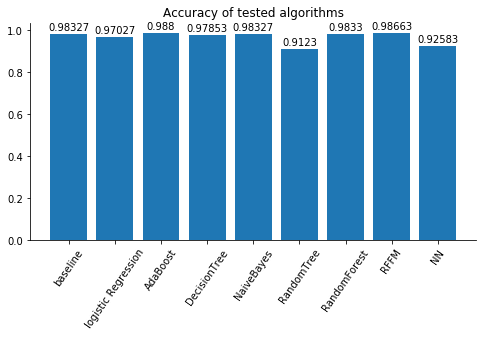

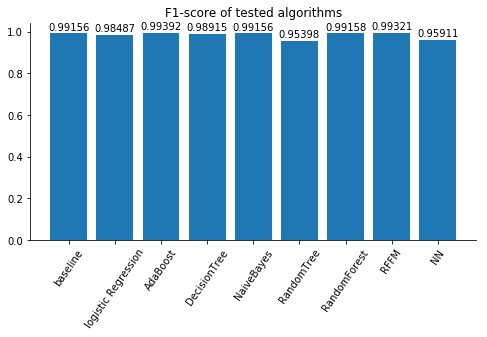

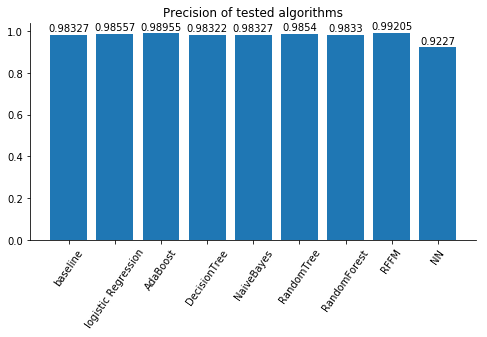

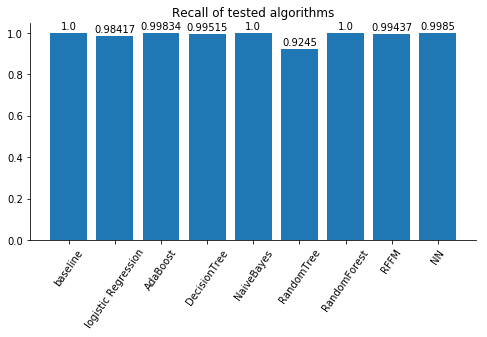

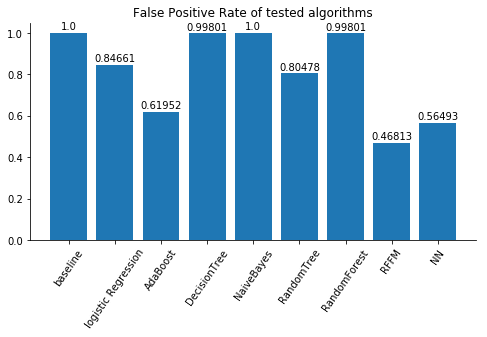

In [570]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)

## Results comparison

In [582]:
y_pred = {}

In [616]:
y_pred["RFFM"] = class_id
y_pred["NN"] = y_pred_NN

In [584]:
# Metrics of baseline method

name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred["baseline"] = np.ones(len(y_test)).ravel() 
else:
    y_pred["baseline"] = np.zeros(len(y_test)).ravel()
        
y_pred["baseline"] = y_pred["baseline"].astype(int)

In [585]:
classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees, random_state = 0),
               "DecisionTree":DecisionTreeClassifier(random_state=0, max_depth = 13),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=167, max_depth=38, random_state=0)),
              }

name = "LogisticReg"
model = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)
y_pred[name] = model.predict(X_test)

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred[name] = model.predict(X_test)

/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [617]:
for k in y_pred:
    print(k + str(len(y_pred[k])))

RFFM62872
NN62872
baseline62872
LogisticReg62872
AdaBoost62872
DecisionTree62872
NaiveBayes62872
RandomTree62872
RandomForest62872


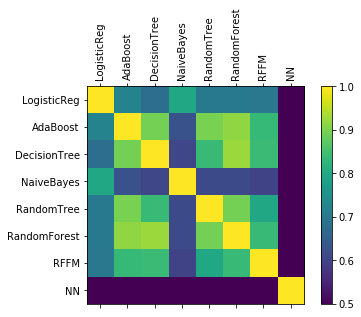

In [618]:
y_pred_pand = pd.DataFrame.from_dict(y_pred)
names = ["LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest", "RFFM", "NN"]
correlations = y_pred_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0.5, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [619]:
print(correlations)

              LogisticReg  AdaBoost  DecisionTree  NaiveBayes  RandomTree  \
LogisticReg      1.000000  0.724315      0.681495    0.796965    0.701976   
AdaBoost         0.724315  1.000000      0.895212    0.625182    0.900309   
DecisionTree     0.681495  0.895212      1.000000    0.607255    0.836278   
NaiveBayes       0.796965  0.625182      0.607255    1.000000    0.611867   
RandomTree       0.701976  0.900309      0.836278    0.611867    1.000000   
RandomForest     0.701221  0.916383      0.924282    0.612663    0.895317   
RFFM             0.700537  0.834274      0.840071    0.603339    0.798890   
NN               0.001759  0.000224     -0.000029    0.002852   -0.000014   

              RandomForest      RFFM        NN  
LogisticReg       0.701221  0.700537  0.001759  
AdaBoost          0.916383  0.834274  0.000224  
DecisionTree      0.924282  0.840071 -0.000029  
NaiveBayes        0.612663  0.603339  0.002852  
RandomTree        0.895317  0.798890 -0.000014  
RandomForest

In [620]:
failures = {}
failures["baseline"] = []
failures["LogisticReg"] = []
failures["AdaBoost"] = []
failures["DecisionTree"] = []
failures["NaiveBayes"] = []
failures["RandomTree"] = []
failures["RandomForest"] = []
failures["RFFM"] = []
failures["NN"] = []

for i in range(0, len(y_test)):
    for key in y_pred.keys():
        if y_pred[key][i] != y_test[i]:
            failures[key].append(10)
        else:
            failures[key].append(1)

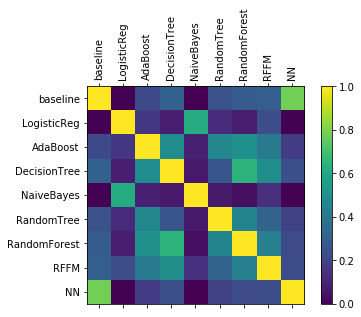

In [621]:
failures_pand = pd.DataFrame.from_dict(failures)
names = ["baseline", "LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest", "RFFM", "NN"]
#names = ["baseline", "LogisticReg", "RandomForest"]
correlations = failures_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [622]:
print(correlations)

              baseline  LogisticReg  AdaBoost  DecisionTree  NaiveBayes  \
baseline      1.000000     0.006450  0.220116      0.311228   -0.133475   
LogisticReg   0.006450     1.000000  0.161618      0.083524    0.619317   
AdaBoost      0.220116     0.161618  1.000000      0.486404    0.089709   
DecisionTree  0.311228     0.083524  0.486404      1.000000    0.068659   
NaiveBayes   -0.133475     0.619317  0.089709      0.068659    1.000000   
RandomTree    0.247472     0.122515  0.464066      0.269448    0.073702   
RandomForest  0.292199     0.080400  0.501583      0.646148    0.041950   
RFFM          0.302155     0.238220  0.411850      0.493401    0.133097   
NN            0.786908     0.006637  0.173440      0.244783   -0.102804   

              RandomTree  RandomForest      RFFM        NN  
baseline        0.247472      0.292199  0.302155  0.786908  
LogisticReg     0.122515      0.080400  0.238220  0.006637  
AdaBoost        0.464066      0.501583  0.411850  0.173440  
Decis

In [623]:
cont_table = [[],[]]
for name in failures.keys():
    print(Counter(failures[name]))
    cont_table[0].append(float(Counter(failures[name])[1]))
    cont_table[1].append(float(Counter(failures[name])[10]))
print(cont_table)

Counter({1: 54763, 10: 8109})
Counter({1: 58330, 10: 4542})
Counter({1: 61747, 10: 1125})
Counter({1: 61277, 10: 1595})
Counter({1: 54527, 10: 8345})
Counter({1: 61457, 10: 1415})
Counter({1: 61725, 10: 1147})
Counter({1: 60341, 10: 2531})
Counter({1: 52085, 10: 10787})
[[54763.0, 58330.0, 61747.0, 61277.0, 54527.0, 61457.0, 61725.0, 60341.0, 52085.0], [8109.0, 4542.0, 1125.0, 1595.0, 8345.0, 1415.0, 1147.0, 2531.0, 10787.0]]


In [624]:
from scipy import stats

# test of independence
# H0 : results are independent

stat, p, dof, expected = stats.chi2_contingency(cont_table)
stats.chi2_contingency(cont_table)
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('\nreject H0 - results dependent')
else:
    print('\nfailed to reject H0 - results independent')

probability=0.950, critical=15.507, stat=27302.329

reject H0 - results dependent


## New data prediction

In [625]:
test_set = pd.read_csv("20151221.txt", sep = "\t", header = None)
test_set.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

print(Counter(test_set["attack_flag"]))

Counter({-1: 210159, 1: 2830})


In [626]:
test_set.loc[:, "attack_flag"] = test_set.loc[:,"attack_flag"].replace(-2, -1)
test_set.loc[:, "attack_flag"] = test_set.loc[:, "attack_flag"] * -1
test_set.loc[:, "attack_flag"] = test_set.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(test_set["attack_flag"]))

Counter({1: 210159, 0: 2830})


In [627]:
# slice dataset, drop additional features
print(test_set.shape)
test_set = test_set.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(test_set.shape)

# drop software markers
test_set = test_set.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
test_set["attack_flag"].value_counts()

(212989, 24)
(212989, 21)


1    210159
0      2830
Name: attack_flag, dtype: int64

In [628]:
# removing NaNs
test_set = test_set.dropna()
test_set.shape

(212989, 18)

In [629]:
test_set["well-known src pool"] = test_set.apply(wk, axis=1)
test_set["registered src pool"] = test_set.apply(reg, axis=1)
test_set["cli src pool"] = test_set.apply(cli, axis=1)

In [630]:
test_set["src port"] = test_set["src port"].apply(str)
test_set["dst port"] = test_set["dst port"].apply(str)
test_set['src port'].nunique()
test_set['dst port'].nunique()

thresh1 = 125
thresh2 = 125
counts1 = test_set['src port'].value_counts()
counts2 = test_set['dst port'].value_counts()

repl1 = counts1[counts1 <= thresh1].index
repl2 = counts2[counts2 <= thresh2].index

#hot one encoding for src port numbers
test_set = pd.concat([test_set, pd.get_dummies(test_set["src port"].replace(repl1, 'other_src'), prefix="is_src")], axis=1)

#hot one encoding for dst port numbers
test_set = pd.concat([test_set, pd.get_dummies(test_set["dst port"].replace(repl2, 'other_dst'), prefix="is_dst")], axis=1)

In [631]:
### hot one encoding ###

# hot one encoding for service
test_set = pd.concat([test_set, pd.get_dummies(test_set["service"], prefix="is")], axis=1)
test_set.tail(10)

#hot one encoding for proto - commented due to reduced column number
test_set = pd.concat([test_set, pd.get_dummies(test_set["proto"], prefix="is")], axis=1)
test_set.tail(10)

# hot one encoding for conn state
test_set = pd.concat([test_set, pd.get_dummies(test_set["Conn state"], prefix="state")], axis=1)
test_set.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_OTH,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SHR
212979,0.000061,other,0,0,20,1.0,0.05,0.15,2,85,...,0,1,0,0,0,0,0,0,0,0
212980,0.000000,other,0,0,1,1.0,0.00,0.22,4,6,...,0,0,0,0,0,0,1,0,0,0
212981,0.000013,other,0,0,13,1.0,0.08,0.26,6,84,...,0,1,0,0,0,0,0,0,0,0
212982,0.000029,other,0,0,2,1.0,0.50,0.25,1,6,...,0,1,0,0,0,0,0,0,0,0
212983,0.000039,other,0,0,14,1.0,0.07,0.24,1,84,...,0,1,0,0,0,0,0,0,0,0
212984,0.000045,other,0,0,15,1.0,0.07,0.23,3,84,...,0,1,0,0,0,0,0,0,0,0
212985,0.000053,other,0,0,16,1.0,0.06,0.22,19,84,...,0,1,0,0,0,0,0,0,0,0
212986,0.000056,other,0,0,17,1.0,0.06,0.21,7,84,...,0,1,0,0,0,0,0,0,0,0
212987,0.000058,other,0,0,18,1.0,0.06,0.20,20,84,...,0,1,0,0,0,0,0,0,0,0
212988,0.000110,dns,36,194,1,1.0,0.00,0.50,0,89,...,0,0,0,0,0,0,0,0,1,0


In [632]:
test_set.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool",
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                     "Conn state" : "Conn_state" 
                    }, inplace=True)

In [633]:
# check differences between datasets after hot one encoding

# print(train_data.columns.difference(test_data.columns)[0])
# columns that are not in test but are in train
test_new_data_full = test_set

# for c in data.columns.difference(test_set.columns):
#     test_set[c] = 0
# for c in test_set.columns.difference(data.columns):
#     test_set = test_set.drop(c, axis=1)
    
print(test_set.columns.difference(data.columns))  
test_set.shape

Index(['is_dst_102', 'is_dst_10200', 'is_dst_119', 'is_dst_143', 'is_dst_223',
       'is_dst_389', 'is_dst_5432', 'is_dst_6050', 'is_dst_631', 'is_dst_82',
       'is_dst_88', 'is_dst_9080', 'is_src_13941', 'is_src_18382',
       'is_src_21320', 'is_src_22055', 'is_src_22207', 'is_src_2295',
       'is_src_29174', 'is_src_300', 'is_src_37286', 'is_src_37396',
       'is_src_37511', 'is_src_38396', 'is_src_40082', 'is_src_40718',
       'is_src_41161', 'is_src_41287', 'is_src_41708', 'is_src_41793',
       'is_src_42206', 'is_src_443', 'is_src_4445', 'is_src_46432',
       'is_src_49354', 'is_src_49362', 'is_src_49376', 'is_src_49414',
       'is_src_5061', 'is_src_5071', 'is_src_5094', 'is_src_5100',
       'is_src_5114', 'is_src_51361', 'is_src_5208', 'is_src_5211',
       'is_src_52131', 'is_src_5229', 'is_src_5247', 'is_src_53265',
       'is_src_53451', 'is_src_53762', 'is_src_54110', 'is_src_54334',
       'is_src_54499', 'is_src_54509', 'is_src_5501', 'is_src_56118',
       'is_

(212989, 193)

In [634]:
test_new_data = test_set.loc[range(30000), :]

for c in data.columns.difference(test_new_data.columns):
    test_new_data[c] = 0
for c in test_new_data.columns.difference(data.columns):
    test_new_data = test_new_data.drop(c, axis=1)

test_new_data = test_new_data.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
    
test_new_data = test_new_data.sample(frac=1)
y_test_new_data = test_new_data.loc[:, "attack_flag"].values.ravel()
X_test_new_data = test_new_data.drop(["attack_flag"], axis=1).astype(np.float32)

In [635]:
print(X_test_new_data.shape)
print(X_test.shape)
print(test_new_data["attack_flag"].value_counts())

(30000, 286)
(62872, 286)
1    29498
0      502
Name: attack_flag, dtype: int64


In [636]:
# Metrics of baseline method
from sklearn import metrics

name = "baseline"

if(y_test_new_data.mean() > (1-y_test_new_data.mean())):
    y_pred = np.ones(len(y_test_new_data)).ravel() 
else:
    y_pred = np.zeros(len(y_test_new_data)).ravel() 
    
Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: baseline     Accuracy: 0.98327, F1-score: 0.99156, Precision: 0.98327, Recall: 1.00000, FPR: 1.00000
TN:   0; FP: 502; FN:    0; TP: 29498



In [637]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_test_new_data)

name = "logistic Regression"

Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: logistic Regression Accuracy: 0.97027, F1-score: 0.98487, Precision: 0.98557, Recall: 0.98417, FPR: 0.84661
TN:  77; FP: 425; FN:  467; TP: 29031



In [638]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


seed = 12
num_trees = 28

classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees, random_state = 0),
               "DecisionTree":DecisionTreeClassifier(random_state=0, max_depth = 13),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=167, max_depth=38, random_state=0)),
              }


for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test_new_data)
    
    Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
    F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
    Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
    Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: AdaBoost     Accuracy: 0.98800, F1-score: 0.99392, Precision: 0.98955, Recall: 0.99834, FPR: 0.61952
TN: 191; FP: 311; FN:   49; TP: 29449

Algorithm: DecisionTree Accuracy: 0.97853, F1-score: 0.98915, Precision: 0.98322, Recall: 0.99515, FPR: 0.99801
TN:   1; FP: 501; FN:  143; TP: 29355

Algorithm: NaiveBayes   Accuracy: 0.98327, F1-score: 0.99156, Precision: 0.98327, Recall: 1.00000, FPR: 1.00000
TN:   0; FP: 502; FN:    0; TP: 29498

Algorithm: RandomTree   Accuracy: 0.91230, F1-score: 0.95398, Precision: 0.98540, Recall: 0.92450, FPR: 0.80478
TN:  98; FP: 404; FN: 2227; TP: 27271



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: RandomForest Accuracy: 0.98330, F1-score: 0.99158, Precision: 0.98330, Recall: 1.00000, FPR: 0.99801
TN:   1; FP: 501; FN:    0; TP: 29498



In [639]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_test_new_data.values},
    y=y_test_new_data,
    batch_size=X_test_new_data.shape[0],
    num_epochs=1,
    shuffle=False)

In [640]:
pred_iterator = estimator_kernel.predict(input_fn = test_input_fn)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [641]:
class_id = []

for pred_dict in pred_iterator:
    class_id.append(pred_dict['classes'])
    #print(pred_dict)

In [642]:
name = "RFFM"

Acc[name] = metrics.accuracy_score(y_test_new_data, class_id)
F1S[name] = metrics.f1_score(y_test_new_data, class_id)
Prec[name] = metrics.precision_score(y_test_new_data, class_id)
Rec[name] = metrics.recall_score(y_test_new_data, class_id)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, class_id).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

RFFM Accuracy: 0.98457, F1-score: 0.99215, Precision: 0.99220, Recall: 0.99210, FPR: 0.45817
TN: 272; FP: 230; FN:  233; TP: 29265



In [643]:
results = []
results = list(NN_model.predict(input_fn=get_input_fn(test_new_data_full.loc[range(30000), :], num_epochs=1, n_batch = X_test.shape[0], shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model2/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [644]:
y_pred = []
for el in results:
    y_pred.append(el["class_ids"])
len(y_pred)

30000

In [645]:
name = "NN"

Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("{0:2} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

NN Accuracy: 0.97637, F1-score: 0.98804, Precision: 0.98335, Recall: 0.99278, FPR: 0.98805
TN:   6; FP: 496; FN:  213; TP: 29285



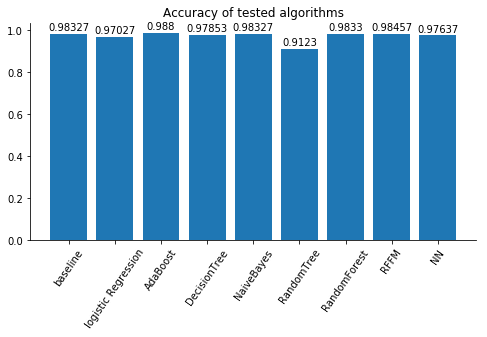

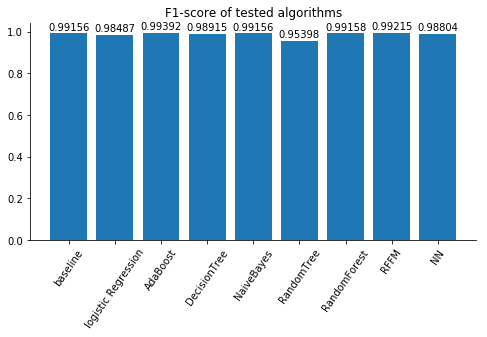

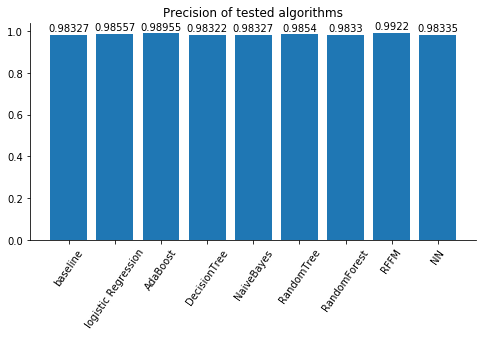

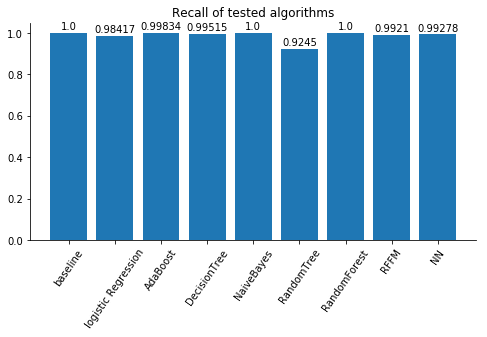

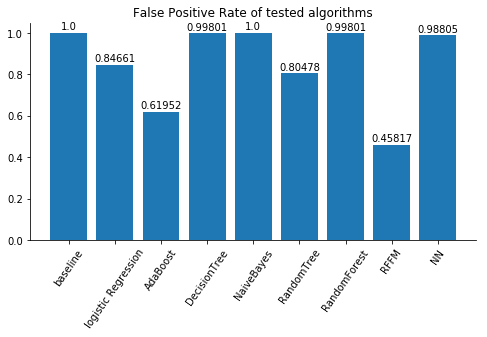

In [646]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)